# Naive Bayes 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statistics as stat

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Plot the pairwise correlations and histograms. 

In [2]:
file = './iris.csv'
data = pd.read_csv(file)
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data2 = data

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.837584,3.057718,3.750336,1.193960
std,0.827849,0.432651,1.767409,0.763547
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

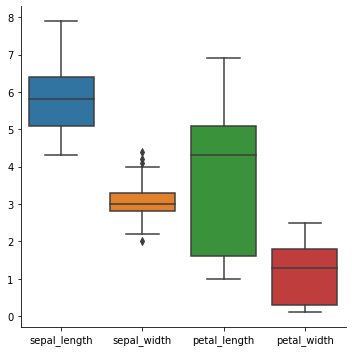

In [6]:
sns.catplot(data=data,kind='box' )

### Removing outliners for sepal width

In [7]:

iqr = data['sepal_width'].quantile(0.75) - data['sepal_width'].quantile(0.25) 
print('iqr = ',iqr)
up = data['sepal_width'].quantile(0.75) + 1.5 * iqr
down = data['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = data['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)
        



iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


In [8]:
data.sepal_width = data.sepal_width.replace(outlier,data.sepal_width.mean())

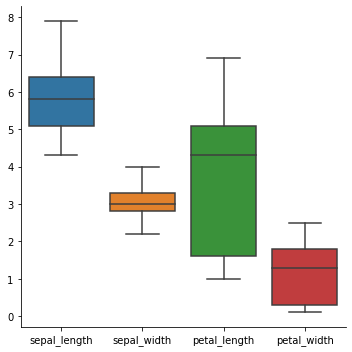

In [9]:
sns.catplot(data=data,kind='box' )

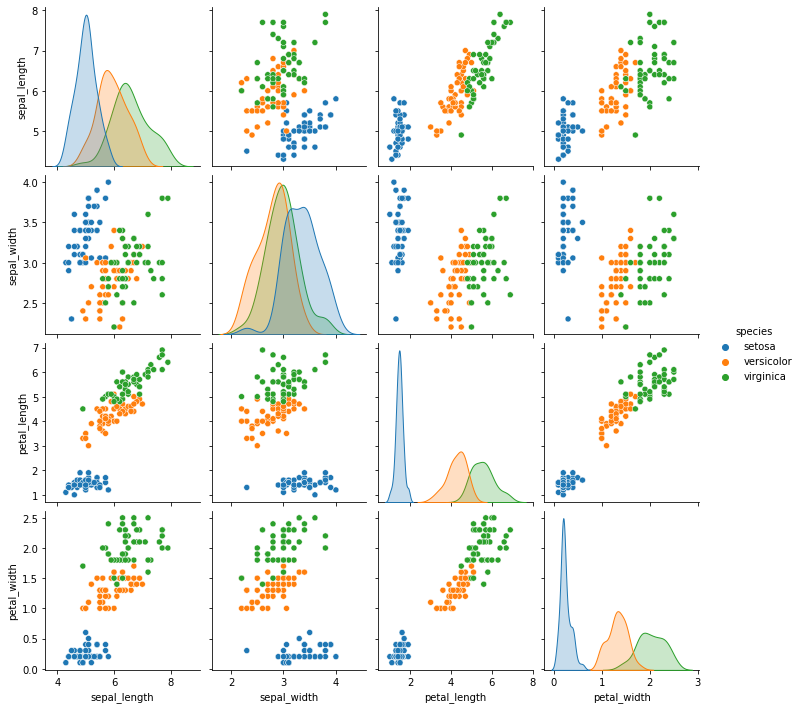

In [10]:
sns.pairplot(data,hue='species')

In [11]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
species = data['species']
species[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [13]:
data = data.drop(['species'],axis = 1)
data[:2]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [14]:
data.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [15]:
data.sepal_length = data.sepal_length.replace(0,np.NaN)
data.sepal_width = data.sepal_width.replace(0,np.NaN)
data.petal_length = data.petal_length.replace(0,np.NaN)
data.petal_width = data.petal_width.replace(0,np.NaN)

In [16]:
data.sepal_length = data.sepal_length.fillna(data.sepal_length.mean())
data.sepal_width = data.sepal_width.fillna(data.sepal_width.mean())
data.petal_length = data.petal_length.fillna(data.petal_length.mean())
data.petal_width = data.petal_width.fillna(data.petal_width.mean())


In [17]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use cross validation to see how well your choice works.

In [18]:
X = data
y = species

In [19]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [21]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [22]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points :0


In [23]:
gnb.score(X,y)

0.9533333333333334

In [24]:
#gnb.score(y_pred,y_test)
#y_pred
accuracy_score(y_test,y_pred)

1.0

In [25]:
# print(cross_val_score(gnb, X, y, cv=15))

# print(X.shape)
# print(y.shape)


### Multinomial

In [26]:
clf = MultinomialNB()
y_predm = clf.fit(X_train, y_train).predict(X_test)

In [27]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_predm).sum()))

Number of mislabeled points out of a total 45 points :18


In [28]:
clf.score(X,y)

0.6666666666666666

In [29]:
accuracy_score(y_test,y_predm)

0.6

### Binomial

In [30]:
clf2 = BernoulliNB()
y_predb = clf2.fit(X_train, y_train).predict(X_test)

In [31]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_predb).sum()))

Number of mislabeled points out of a total 45 points :34


In [32]:
clf2.score(X,y)

0.3333333333333333

In [33]:
accuracy_score(y_test,y_predb)

0.24444444444444444

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [34]:
a = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(a)
print('mean = ',stat.mean(a))

[0.86666667 0.96666667 0.93333333 0.93333333 0.96666667]
mean =  0.9333333333333333


In [35]:
a = cross_val_score(clf, X, y, cv=5, scoring='accuracy' )
print(a)
print('mean = ',stat.mean(a))

[1.         0.96666667 0.9        0.86666667 0.96666667]
mean =  0.9400000000000001


In [36]:
a = cross_val_score(clf2, X, y, cv=5, scoring='accuracy' )
print(a)
print('mean = ',stat.mean(a))

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
mean =  0.3333333333333333


## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

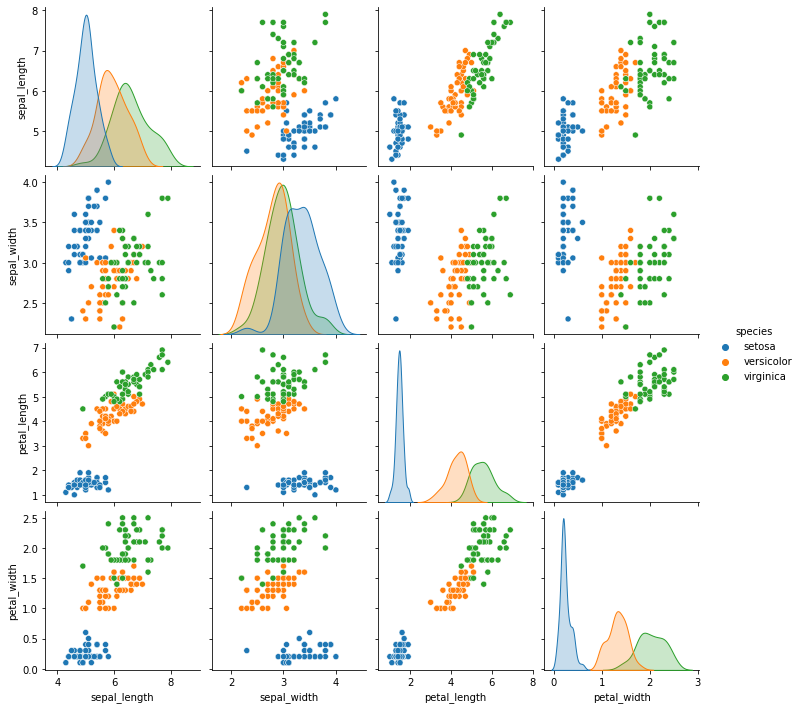

In [37]:
sns.pairplot(data2,hue = 'species')

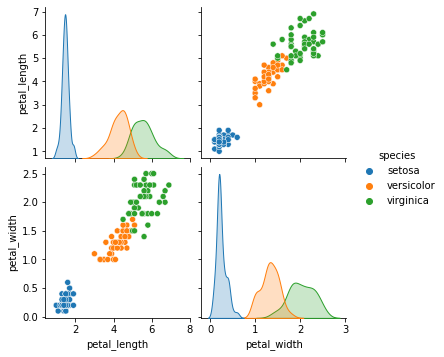

In [38]:
data3 = data2
data3 = data3.drop(['sepal_length','sepal_width'],axis=1)
sns.pairplot(data3, hue='species' )

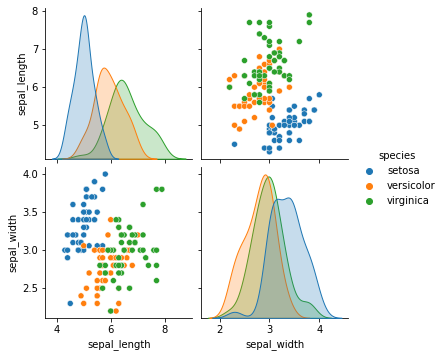

In [39]:
data2 = data2.drop(['petal_length','petal_width'],axis=1)
sns.pairplot(data2, hue='species' )

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

In [40]:
data2 = data
final = []

#for i in range (10):
#     data2['sepal_length'+str(i)]=data2['sepal_length']
a  = [0,1,3,5,10,50,100]



for i in a:
    for j in range(i):
        data2['sepal_length'+str(j)]=data2['sepal_length']
    print(data2.columns,'\n\n')
    temp = cross_val_score(gnb, data2, y, cv=5, scoring='accuracy' )
    final.append(stat.mean(temp))
    



Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_length4'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_length4', 'sepal_length5', 'sepal_length6', 'sepal_length7',
       'sepal_length8', 'sepal_length9'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_l

C:\Users\DELL\AppData\Local\Temp\ipykernel_2080\1775106405.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['sepal_length'+str(j)]=data2['sepal_length']


In [41]:
print(final)

[0.9333333333333333, 0.9333333333333333, 0.9133333333333333, 0.86, 0.8466666666666667, 0.76, 0.76]


Text(0.5, 1.0, 'Accuracy vs Independent variables')

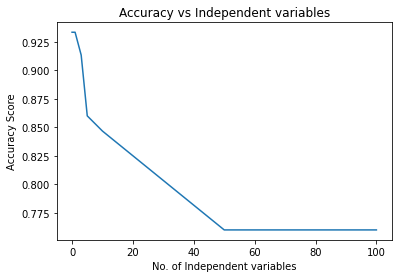

In [42]:
plt.plot(a,final)
plt.xlabel('No. of Independent variables')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Independent variables')
